# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('demo01(1).csv')  


In [22]:
# Visualizando as primeiras linhas para entender as variáveis
print(df.head())

# Verificando os tipos de dados
print(df.dtypes)

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M                Y               Y           0               Working   
1    F                N               Y           0  Commercial associate   
2    F                N               Y           0  Commercial associate   
3    M                Y               Y           0               Working   
4    F                Y               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  \
0  5

In [24]:
print(df.isnull().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


mau
False    16260
True       390
Name: count, dtype: int64


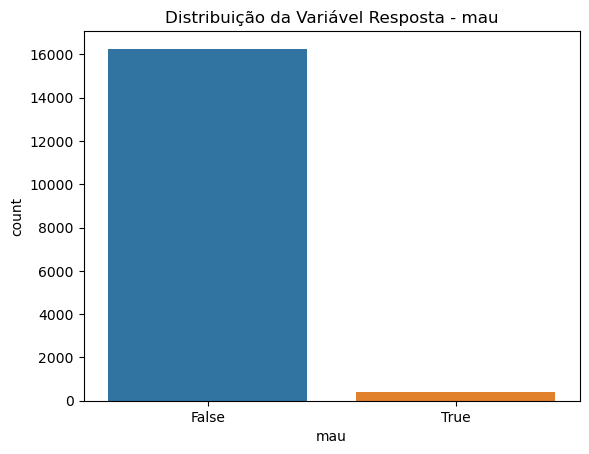

In [26]:
# Contando a distribuição da variável resposta 'mau'
print(df['mau'].value_counts())

# Visualizando a distribuição da variável resposta 'mau'
sns.countplot(x='mau', data=df)
plt.title('Distribuição da Variável Resposta - mau')
plt.show()


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [32]:
metadata = pd.DataFrame({
    'variavel': df.columns,
    'tipo': df.dtypes
})
metadata['qtd_categorias'] = [df[col].nunique() if df[col].dtype == 'object' else 'NA' for col in df.columns]

In [34]:
# Utilizando um loop para contar o número de categorias
categorias = []
for col in df.columns:
    if df[col].dtype == 'object' or (df[col].dtype in ['int64', 'float64'] and df[col].nunique() < 10):  # assumindo que números com menos de 10 valores únicos podem ser categóricos
        categorias.append(df[col].nunique())
    else:
        categorias.append('NA')  # 'NA' para variáveis numéricas com muitos valores únicos ou contínuas

metadata['qtd_categorias'] = categorias

In [36]:
# Selecionar as colunas que precisam ser convertidas em dummies
cols_para_dummies = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]

# Criar dummies
df_dummies = pd.get_dummies(df, columns=cols_para_dummies, drop_first=True)

# Exibir as primeiras linhas do novo dataframe com dummies
print(df_dummies.head())

  sexo posse_de_veiculo posse_de_imovel  qtd_filhos      idade  tempo_emprego  \
0    M                Y               Y           0  58.832877       3.106849   
1    F                N               Y           0  52.356164       8.358904   
2    F                N               Y           0  52.356164       8.358904   
3    M                Y               Y           0  46.224658       2.106849   
4    F                Y               N           0  29.230137       3.021918   

   possui_celular  possui_fone_comercial  possui_fone  possui_email  ...  \
0               1                      0            0             0  ...   
1               1                      0            1             1  ...   
2               1                      0            1             1  ...   
3               1                      1            1             1  ...   
4               1                      0            0             0  ...   

   educacao_Secondary / secondary special  estado_civil_

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [38]:
# Identificar as colunas que são do tipo object e precisam de dummies
cols_para_dummies = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]

# Criar dummies para as colunas identificadas
df_dummies = pd.get_dummies(df, columns=cols_para_dummies, drop_first=True)

In [44]:
# Remover colunas do tipo 'object' que ainda possam existir
df_final = df_dummies.select_dtypes(exclude=['object'])
df_final

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_renda_Pensioner,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [46]:
# Tabela cruzada para 'possui_email' e 'mau'
cross_email = pd.crosstab(df['possui_email'], df['mau'], normalize='index')

# Tabela cruzada para 'posse_de_veiculo' e 'mau'
cross_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index')

print("Tabela Cruzada - Possui Email vs Mau:")
print(cross_email)
print("\nTabela Cruzada - Posse de Veículo vs Mau:")
print(cross_veiculo)


Tabela Cruzada - Possui Email vs Mau:
mau              False     True 
possui_email                    
0             0.976269  0.023731
1             0.979730  0.020270

Tabela Cruzada - Posse de Veículo vs Mau:
mau                  False     True 
posse_de_veiculo                    
N                 0.975732  0.024268
Y                 0.977905  0.022095


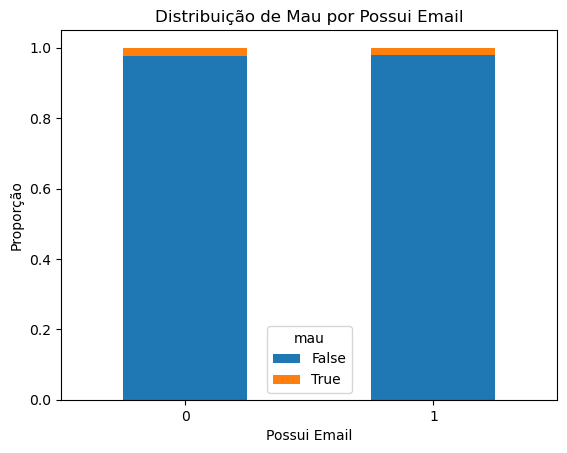

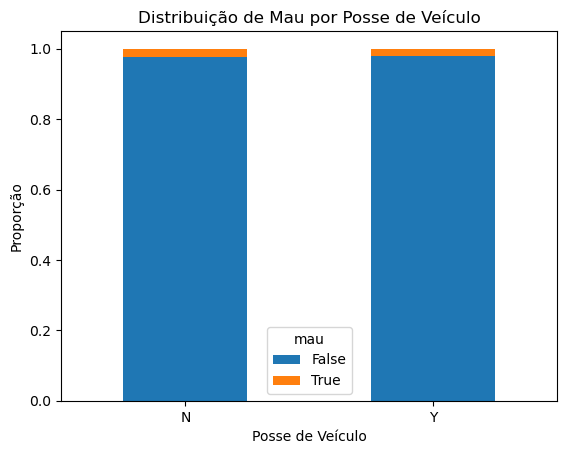

In [48]:
import matplotlib.pyplot as plt

cross_email.plot(kind='bar', stacked=True)
plt.title('Distribuição de Mau por Possui Email')
plt.ylabel('Proporção')
plt.xlabel('Possui Email')
plt.xticks(rotation=0)
plt.show()

cross_veiculo.plot(kind='bar', stacked=True)
plt.title('Distribuição de Mau por Posse de Veículo')
plt.ylabel('Proporção')
plt.xlabel('Posse de Veículo')
plt.xticks(rotation=0)
plt.show()


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [50]:
df_final.to_csv('demo01final', index=False)  
